In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install catboost
from catboost import CatBoostClassifier, Pool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [7]:
train_data = pd.read_csv('sample_data/train.csv')
train_data.T

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
ID_code,train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,...,train_199990,train_199991,train_199992,train_199993,train_199994,train_199995,train_199996,train_199997,train_199998,train_199999
target,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
var_0,8.9255,11.5006,8.6093,11.0604,9.8369,11.4763,11.8091,13.558,16.1071,12.5088,...,14.1475,9.9909,12.2825,13.2152,12.3925,11.488,4.9149,11.2232,9.7148,10.8762
var_1,-6.7863,-4.1473,-2.7457,-2.1518,-1.4834,-2.3182,-0.0832,-7.9881,2.4426,1.9743,...,1.8568,2.5523,2.6918,-5.8006,-5.8821,-0.4956,-2.4484,-5.0518,-8.6098,-5.7105
var_2,11.9081,13.8588,12.0805,8.9522,12.8746,12.608,9.3494,13.8776,13.9307,8.896,...,11.0066,11.9653,15.4684,9.726,11.2323,8.2622,16.7052,10.5127,13.6104,12.1183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,-2.3978,2.0339,3.1417,-1.2706,-1.5121,1.0314,0.5845,-0.3776,-1.994,0.4467,...,1.717,0.5328,-0.2854,0.3916,-1.4843,-1.7939,1.7337,-1.5736,-0.0786,-2.4907
var_196,7.8784,8.1267,-6.5213,-2.9275,3.9267,-3.6241,9.1104,4.2178,-1.0733,14.1287,...,-4.0032,-5.3444,7.6252,6.7302,-3.9299,2.1661,-2.1651,1.2832,6.798,-2.2342
var_197,8.5635,8.7889,8.2675,10.2922,9.5031,9.767,9.1143,9.4237,8.1975,7.9133,...,9.1627,8.5414,10.1758,8.9709,9.1164,8.5326,6.7419,8.7155,10.0342,8.1857
var_198,12.7803,18.356,14.7222,17.9697,17.9974,12.5809,10.8869,8.6624,19.5114,16.2375,...,13.8077,13.2895,17.4066,14.5405,16.317,16.666,15.9054,13.8329,15.5289,12.1284


<Axes: >

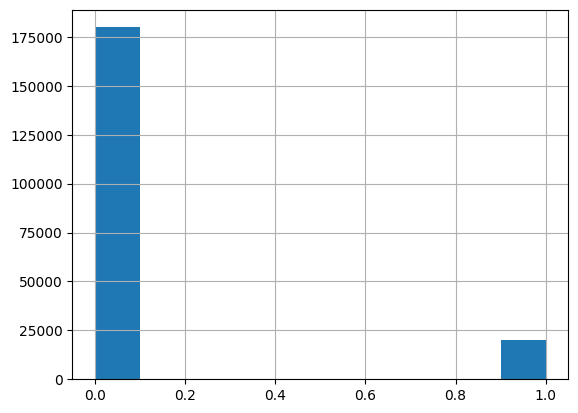

In [8]:
train_data['target'].hist()

In [9]:
train_data['target'].value_counts()

,count
target,
0,179902
1,20098


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [11]:
train_data = train_data.drop('ID_code', axis=1)
train_data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [12]:
data = train_data.T.to_numpy()[1:].T.astype(np.float64)
lable = train_data.T.to_numpy()[0].astype(np.int32)

In [13]:
data = StandardScaler().fit_transform(data)

In [14]:
train_x, test_x, train_y, test_y = train_test_split(data, lable, test_size=0.125,shuffle=False)

In [15]:
sum(train_y)/len(train_y)

0.10018857142857143

In [16]:
sum(test_y)/len(test_y)

0.1026

In [17]:
(len(train_y)-sum(train_y))/sum(train_y)

8.981178349398277

In [41]:
model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    task_type="GPU",
    learning_rate=0.01,
    metric_period= 10,
    iterations=70000,
    l2_leaf_reg=50,
    random_seed=432013,
    od_type="Iter",
    depth=5,
    early_stopping_rounds=15000,
    border_count=64,
    class_weights= {0:1, 1: 200000/25000}
)

In [42]:
model.fit(
    Pool(train_x, train_y),
    eval_set=Pool(test_x, test_y),
    use_best_model=True,
    verbose=500
)

0:	test: 0.6399264	best: 0.6399264 (0)	total: 14.3ms	remaining: 16m 41s
500:	test: 0.8367183	best: 0.8367825 (496)	total: 3.62s	remaining: 8m 21s
1000:	test: 0.8625860	best: 0.8625860 (1000)	total: 11.2s	remaining: 12m 53s
1500:	test: 0.8750622	best: 0.8750622 (1500)	total: 14.9s	remaining: 11m 20s
2000:	test: 0.8819454	best: 0.8819454 (2000)	total: 18.4s	remaining: 10m 26s
2500:	test: 0.8864660	best: 0.8864689 (2499)	total: 24.5s	remaining: 11m
3000:	test: 0.8898032	best: 0.8898032 (3000)	total: 29.7s	remaining: 11m 3s
3500:	test: 0.8922766	best: 0.8922766 (3500)	total: 33.2s	remaining: 10m 30s
4000:	test: 0.8940699	best: 0.8940718 (3999)	total: 37.6s	remaining: 10m 20s
4500:	test: 0.8955058	best: 0.8955058 (4500)	total: 44.4s	remaining: 10m 45s
5000:	test: 0.8965526	best: 0.8965526 (4999)	total: 48s	remaining: 10m 24s
5500:	test: 0.8974172	best: 0.8974233 (5498)	total: 51.7s	remaining: 10m 6s
6000:	test: 0.8980778	best: 0.8980835 (5989)	total: 59.1s	remaining: 10m 30s
6500:	test: 0.8

In [43]:
model.score(
    test_x,
    test_y
)

0.8712

In [46]:
test_data = pd.read_csv('sample_data/test.csv')
test_data

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [47]:
ID_code = pd.DataFrame(test_data['ID_code'])

test_data = test_data.drop('ID_code', axis=1)
test_data = test_data.to_numpy().astype(np.float64)
test_data = StandardScaler().fit_transform(test_data)
out = model.predict(test_data)

ID_code.insert(len(ID_code.columns), 'target', out)
ID_code.to_csv('submission.csv', index=False)